# 导入相关库
## 将硬件设计载入板卡



In [34]:
from pynq import Overlay, allocate

overlay = Overlay("filter2d_2.bit")

filter2d = overlay.filter2d_accel_0

In [35]:
import os
import numpy as np
import time
from __future__ import division
import matplotlib.pyplot as plt

In [36]:
data=[]
src=[]
data = np.loadtxt('src.txt')

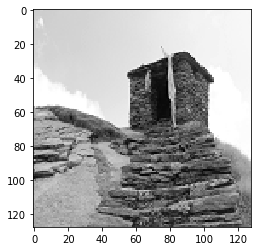

In [37]:
for i in data:
    src.append(int(i))

img = np.array (src)
d = img.reshape((128,128))
import cv2
plt.imshow(d,cmap='gray')


# 分配内存供IP使用
## 为输入 输出 卷积核分配内存

In [38]:
input_buffer = allocate(shape=(16384,), dtype='i4')
output_buffer = allocate(shape=(15876,), dtype='i4')
kernel_buffer = allocate(shape=(9,), dtype='i4')

## 输入卷积核

In [39]:
kernel=[]
kernel = [-1,-2,-1,0,0,0,1,2,1];
np.copyto(input_buffer, img)
np.copyto(kernel_buffer, np.int32(kernel))

In [40]:
kernel_buffer[0:9]

PynqBuffer([-1, -2, -1,  0,  0,  0,  1,  2,  1])

# 配置IP
## 将分配的内存空间的地址写入IP的对应位置

In [41]:
filter2d.s_axi_control.write(0x14,input_buffer.physical_address)
filter2d.s_axi_control.write(0x2c,output_buffer.physical_address)
filter2d.s_axi_control.write(0x20,kernel_buffer.physical_address)
filter2d.s_axi_CTRL.write(0x10, rows)
filter2d.s_axi_CTRL.write(0x18, cols)

In [42]:
import time

filter2d.s_axi_CTRL.write(0x00, 0x01)
start_time = time.time()
while True:
    reg = filter2d.s_axi_CTRL.read(0x00)
    if reg != 1:
        break
end_time = time.time()

print("耗时：{}s".format(end_time - start_time))

KeyboardInterrupt: 

## 输出结果

In [ ]:
output_buffer[10000:10009]

In [ ]:
dst = np.array (output_buffer)
img_out = dst.reshape((126,126))
plt.imshow(img_out,cmap='gray')